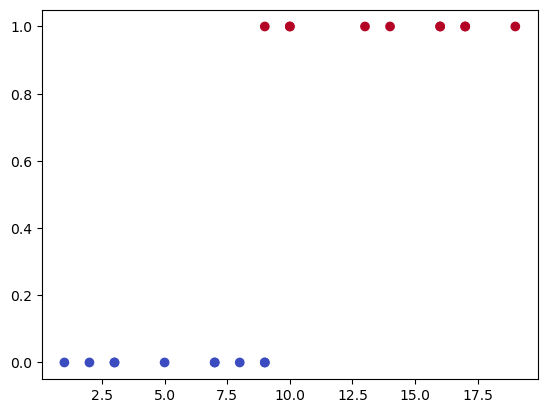

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
noise = 5*np.random.randn(20)

x = np.append(np.random.randint(1,10,10), np.random.randint(9,20,10))
y = np.append(np.zeros(10), np.ones(10))


plt.scatter(x,y, c =y, cmap='coolwarm')
plt.show()

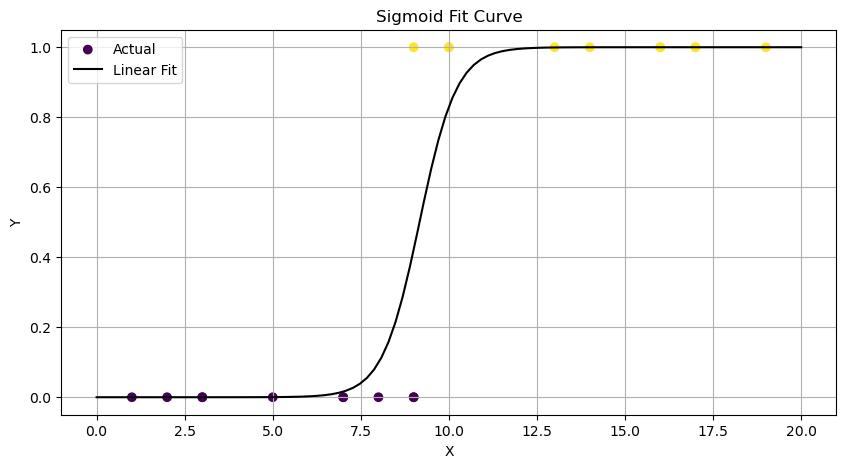

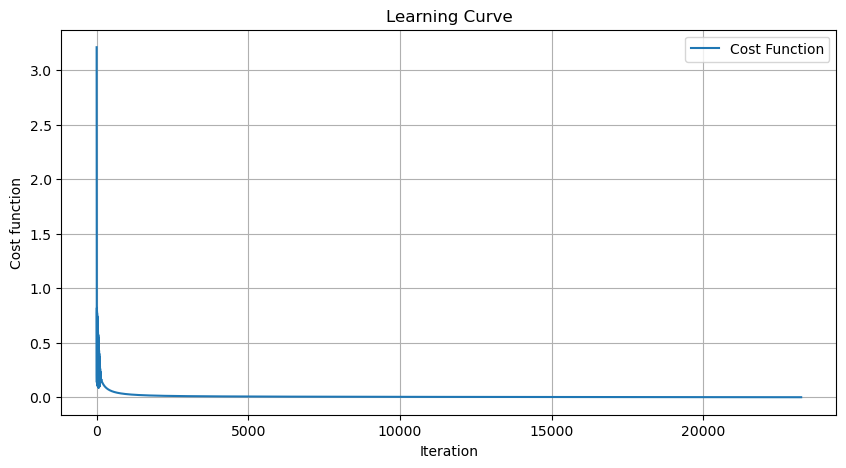

In [2]:
def cost_function(w,b):
    return (y*np.log(segmoid(x,w,b)) - (1-y)*np.log(1-segmoid(x,w,b))).sum()/m

def segmoid(x,w,b):
    return 1/(1+np.exp(-1*(w*x+b)))

def gradient_decent(w,b):
    w_temp = w - alpha*(((segmoid(x,w,b)-y)*x).sum())/m
    b_temp = b - alpha*((segmoid(x,w,b)-y).sum())/m
    w = w_temp
    b = b_temp
    return w,b

alpha = 0.1
w = 1
b = 1
m = len(x)

cost = np.array([cost_function(w,b)])
iterations = np.array([1])

w,b = gradient_decent(w,b)
cost = np.append(cost,cost_function(w,b))
iteration = 2
iterations = np.append(iterations,iteration)

while (abs(cost[-2]-cost[-1])>0.0000002): 
    w,b = gradient_decent(w,b)
    cost = np.append(cost,cost_function(w,b))
    iteration += 1
    iterations = np.append(iterations,iteration)

    
xlabel = np.linspace(0,20,100)
ylabel =  segmoid(xlabel,w,b)
plt.figure(figsize=(10,5))
plt.scatter(x,y, label = 'Actual', c = y)
plt.plot(xlabel,ylabel, label = 'Linear Fit', c = 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid Fit Curve')
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize=(10,5))
plt.plot(iterations,cost, label = 'Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression
model_ = LogisticRegression()
model_.fit(np.array([x]).T,y)

print(f'sklearn model params ==> w = {model_.coef_[0][0]:.2f}, b = {model_.intercept_[0]:.2f} with  cost = {cost_function(1.1648858,-10.78205443):.4f}')
print(f'Gradient Decent parm ==> w = {w:.2f}, b = {b:.2f} with cost = {cost_function(w,b):.4f} // {iterations[-1]} iterations ')

sklearn model params ==> w = 1.16, b = -10.78 with  cost = -0.0053
Gradient Decent parm ==> w = 1.90, b = -17.44 with cost = -0.0002 // 23226 iterations 
